In [1]:
import backtrader as bt
import backtrader.feeds as btfeeds
import backtrader.plot as btp
from datetime import datetime
import matplotlib as plt

In [2]:
class MyStrategy(bt.Strategy):
    
    params = (
        ('fast_period', 10),
        ('slow_period', 20)
    )
    
    def notify_trade(self, trade):
        if trade.isclosed:
            dt = self.data.datetime.date()
            dt_str = dt.isoformat()
            print(f"Trade Closed: {dt_str}, PnL: {trade.pnl:.2f}")
    
    def __init__(self):
        self.fast_sma = bt.indicators.SimpleMovingAverage(
            self.data.close,
            period=self.params.fast_period
        )
        
        self.slow_sma = bt.indicators.SimpleMovingAverage(
            self.data.close,
            period=self.params.slow_period
        )
        
        self.crossover = bt.indicators.CrossOver(
            self.fast_sma,
            self.slow_sma
        )
    
    def next(self):
        if self.position.size == 0 and self.crossover > 0:
            self.buy(size=1000)
        elif self.position.size > 0 and self.crossover < 0:
            self.sell(size=1000)

cerebro = bt.Cerebro()
#cerebro.broker.setcommission(mult=10.0)  # 10x leverage (1/0.1), need to investigate more
cerebro.broker.setcommission(leverage=10)  # 10x leverage, need to investigate more
# https://backtest-rookies.com/2017/08/28/backtrader-oanda-margin-leverage/

In [3]:
#TODO make this more generic to be able to read all formats
forex_data = btfeeds.GenericCSVData(
    dataname='../CSVData/EURUSD_Daily_201701020000_202207120000.csv',
    dtformat=('%Y.%m.%d'),
    tmformat=('%H:%M:%S'),
    separator='\t',
    #timeframe=bt.TimeFrame.Days, 
    #compression=1,
    datetime=0,
    #time=1,
    high=2, 
    low=3, 
    open=1, 
    close=4, 
    volume=6, 
    openinterest=-1
)

In [4]:
# Add the forex data to cerebro
cerebro.adddata(forex_data)

# Add the strategy to cerebro
cerebro.addstrategy(MyStrategy)

# Run the backtest
cerebro.run(writer=True, verbose=2)

# Print the final portfolio value
print(f"Final Portfolio Value: {cerebro.broker.getvalue():.2f}")


Trade Closed: 2017-04-07, PnL: -9.34
Trade Closed: 2017-06-20, PnL: 28.08
Trade Closed: 2017-08-22, PnL: 37.44
Trade Closed: 2017-09-26, PnL: -13.03
Trade Closed: 2017-10-30, PnL: -24.54
Trade Closed: 2017-12-14, PnL: 4.05
Trade Closed: 2018-02-16, PnL: 61.97
Trade Closed: 2018-03-01, PnL: -12.43
Trade Closed: 2018-03-29, PnL: -5.99
Trade Closed: 2018-04-09, PnL: 0.95
Trade Closed: 2018-04-26, PnL: -21.27
Trade Closed: 2018-06-22, PnL: -14.78
Trade Closed: 2018-07-27, PnL: -9.79
Trade Closed: 2018-09-17, PnL: -7.08
Trade Closed: 2018-10-05, PnL: -26.23
Trade Closed: 2018-12-04, PnL: 6.86
Trade Closed: 2018-12-07, PnL: 3.20
Trade Closed: 2018-12-11, PnL: -3.45
Trade Closed: 2019-01-24, PnL: 1.97
Trade Closed: 2019-02-14, PnL: -10.03
Trade Closed: 2019-03-12, PnL: -12.50
Trade Closed: 2019-04-03, PnL: -8.97
Trade Closed: 2019-04-29, PnL: -15.96
Trade Closed: 2019-05-24, PnL: -1.96
Trade Closed: 2019-07-11, PnL: -2.46
Trade Closed: 2019-08-22, PnL: -5.36
Trade Closed: 2019-09-27, PnL: -9.

<IPython.core.display.Javascript object>


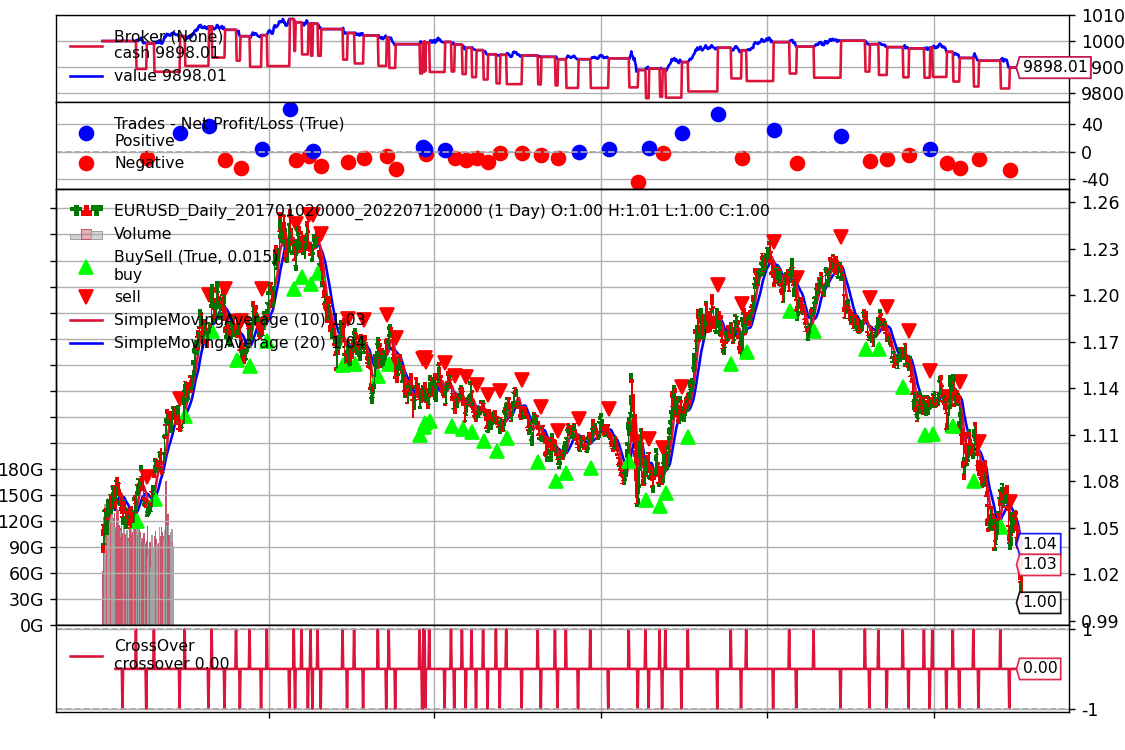

[[<Figure size 900x600 with 5 Axes>]]

In [5]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=[9, 6]
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.facecolor']='w'
plt.rcParams['figure.edgecolor']='k'
# Plot the trades
cerebro.plot(style='candlestick', barup='green', bardown='red')